In [ ]:
from IPython.core.debugger import set_trace
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
import time
import math

plt.style.use(style="seaborn")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

<ipython-input-1-2348cc1ab94f>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style="seaborn")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/GOOG_Price.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume,Ngay,Change
0,1/4/2016,37.15,37.20,36.56,37.09,37.09,65456000,1.001347,-0.009863
1,1/5/2016,37.32,37.60,36.93,37.13,37.13,39014000,1.001078,0.000468
2,1/6/2016,36.50,37.36,36.45,37.18,37.18,38940000,1.001347,0.000584
3,1/7/2016,36.52,36.92,35.95,36.32,36.32,59274000,0.976869,-0.010164
4,1/8/2016,36.57,36.66,35.65,35.72,35.72,49018000,0.983480,-0.007234
...,...,...,...,...,...,...,...,...,...
1505,12/23/2021,147.09,148.57,146.95,147.14,147.14,13818000,1.001293,0.000561
1506,12/27/2021,147.46,148.43,147.25,148.06,148.06,13256000,1.006253,0.002707
1507,12/28/2021,148.37,148.37,145.94,146.45,146.45,18624000,0.989126,-0.004748
1508,12/29/2021,146.43,147.18,145.50,146.50,146.50,17022000,1.000341,0.000148


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00


In [ ]:
n = int(len(df) * 0.8)
# n_=int(len(df)*0.1)
#n = 1751
train = {}
test = {}
train_index = {}
test_index = {}
train = df['Change'][:n]
test = df['Change'][n:]
train_index = df['Close'][:n]
test_index = df['Close'][n:]
# valid=df.Close[n+n_:len(df)]

In [ ]:
from pmdarima.arima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8484.155, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8504.458, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8503.543, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-8502.558, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8502.528, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-8500.593, Time=1.35 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8504.446, Time=0.56 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.729 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1208
Model:               SARIMAX(1, 0, 0)   Log Likelihood                4254.229
Date:                Thu, 25 Jan 2024   AIC                          -8504.458
Time:                        12:33:21   BIC                          -8494.264
Sample:         

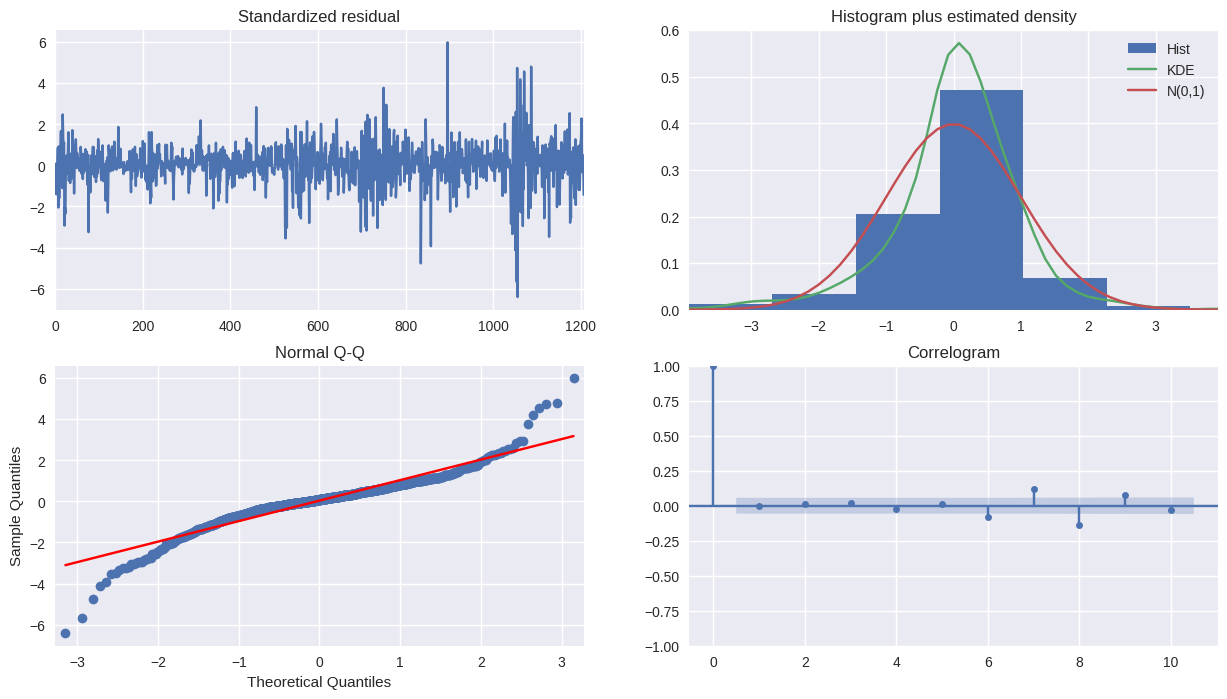

In [ ]:
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
#result = model_autoARIMA.fit(method="innovations_mle")
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(1,0,0))
model=model.fit(method="innovations_mle")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Change   No. Observations:                 1208
Model:                 ARIMA(1, 0, 0)   Log Likelihood                4255.224
Date:                Thu, 25 Jan 2024   AIC                          -8504.447
Time:                        12:36:54   BIC                          -8489.157
Sample:                             0   HQIC                         -8498.689
                               - 1208                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.372      0.170      -0.000       0.001
ar.L1         -0.1369      0.017     -8.130      0.000      -0.170      -0.104
sigma2      5.104e-05   1.12e-06     45.724      0.000    4.88e-05    5.32e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1826.87
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.04   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

         Date   Open   High    Low  Close  Adj Close     Volume      Ngay  \
0    1/4/2016  37.15  37.20  36.56  37.09      37.09   65456000  1.001347   
1    1/5/2016  37.32  37.60  36.93  37.13      37.13   39014000  1.001078   
2    1/6/2016  36.50  37.36  36.45  37.18      37.18   38940000  1.001347   
3    1/7/2016  36.52  36.92  35.95  36.32      36.32   59274000  0.976869   
4    1/8/2016  36.57  36.66  35.65  35.72      35.72   49018000  0.983480   
5   1/11/2016  35.83  35.94  35.18  35.80      35.80   41812000  1.002240   
6   1/12/2016  36.08  36.44  35.87  36.30      36.30   40490000  1.013966   
7   1/13/2016  36.54  36.74  34.93  35.03      35.03   50034000  0.965014   
8   1/14/2016  35.27  36.10  34.46  35.74      35.74   44516000  1.020268   
9   1/15/2016  34.61  35.34  34.27  34.72      34.72   72162000  0.971461   
10  1/19/2016  35.17  35.50  34.67  35.09      35.09   45362000  1.010657   
11  1/20/2016  34.43  35.34  33.66  34.92      34.92   68900000  0.995155   

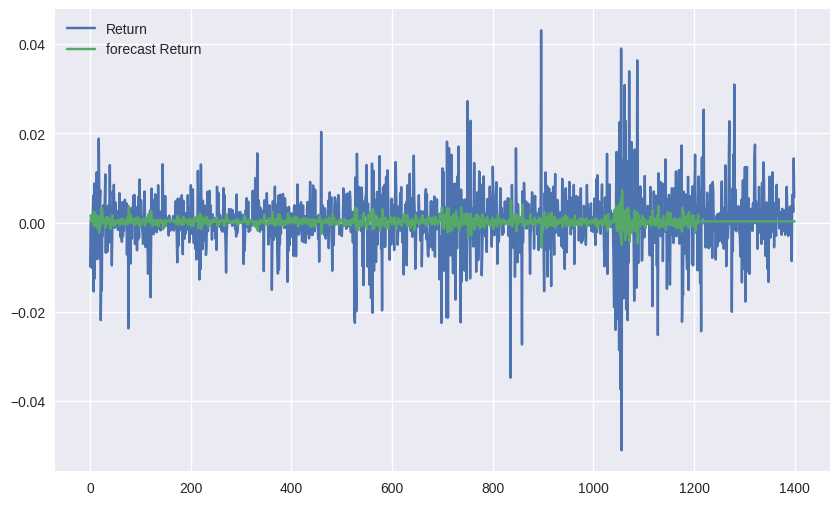

In [ ]:
# Actual vs Fitted
print(df[0:20], "\n\n")
predict = model.predict(start=1, end=1400, dynamic=False)
plt.plot(df["Change"][:1400], label=f"Return")
plt.plot(predict, label=f"forecast Return")

plt.legend(loc="upper left")

In [ ]:
step = len(test)
model = ARIMA(train, order=(1,0,0))
result = model.fit(method="innovations_mle")
# Forecast
fc = result.forecast(steps=step)
print(fc)


1208    0.001760
1209    0.000049
1210    0.000284
1211    0.000251
1212    0.000256
          ...   
1505    0.000255
1506    0.000255
1507    0.000255
1508    0.000255
1509    0.000255
Name: predicted_mean, Length: 302, dtype: float64


In [ ]:
model = ARIMA(train, order=(1,0,0))
fitted = model.fit(method='innovations_mle')

In [ ]:

fc = fitted.forecast(302, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test[:302].index)
# lower_series = pd.Series(conf[:, 0], index=test[:10].index)
# upper_series = pd.Series(conf[:, 1], index=test[:10].index)


for i in range(1208, 1510):
        fc_series[i] = (10**fc[i])*df["Close"][i]
        print(fc_series[i])

78.11593920276049
79.67903139200172
80.82274339728608
82.09751453748048
79.56685428220415
80.25714966947919
75.87458937562718
78.40607502363987
81.09765700956005
81.34780396873417
82.55851544782199
87.51142602109516
88.22184349748012
88.1417964578847
88.20183173757201
87.0711673034996
87.69153186024717
87.54144366103405
88.90224333389959
89.1223726927455
88.56204341568322
87.39135546182095
88.25186113730946
87.16122022302751
86.7910026649685
88.49200225605043
88.62207869536846
89.7127196096504
88.0917670581488
89.95286072839139
91.4537427205225
91.39370744083726
91.4537427205225
91.02348988277824
90.98346636298808
89.26245501201106
88.82219629431927
89.14238445264058
88.05174353835864
88.44197285631273
88.20183173757175
87.44138486155866
86.60089094596523
87.02113790376194
86.23067338790622
86.67093210559803
86.99112026391931
88.8522139341619
87.9917082586734
87.03114378370948
87.64150246050947
86.46080862669966
87.10118494334226
86.81101442486359
89.41254321122418
90.41313120597826
88

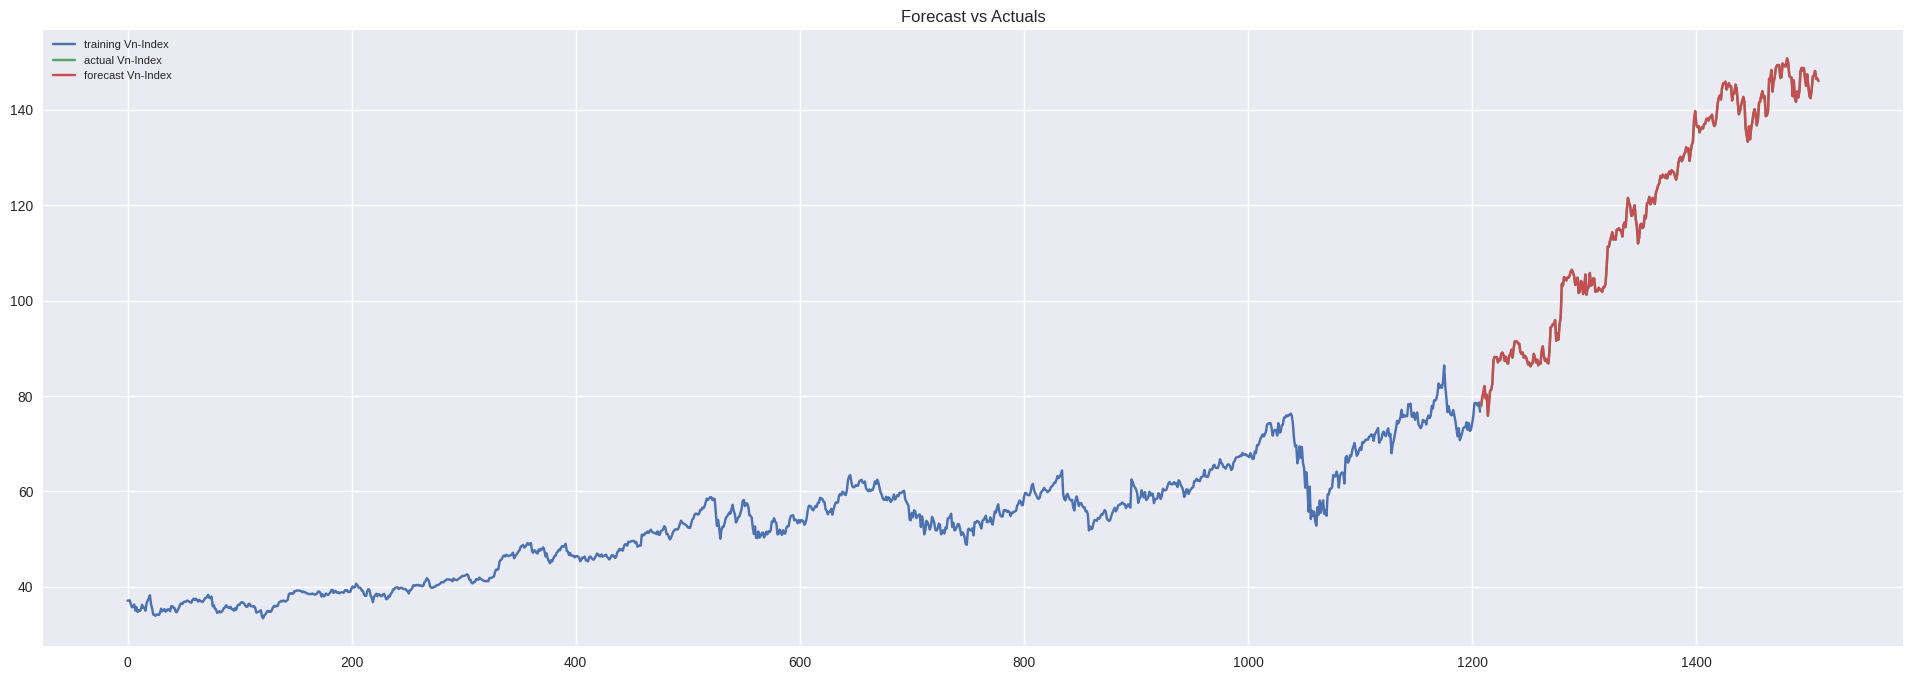

In [ ]:
# Plot
plt.figure(figsize=(24, 8), dpi=100)
plt.plot(train_index, label=f"training Vn-Index")
plt.plot(test_index, label=f"actual Vn-Index")
plt.plot(fc_series, label=f"forecast Vn-Index")
# plt.fill_between(lower_series.index, lower_series, upper_series, color="k", alpha=0.15)
plt.title(f"Forecast vs Actuals")
plt.legend(loc="upper left", fontsize=8)
plt.show()